This notebook will build on our clustering work from last time, and explore various machine learning techniques to look at our data.

Part 1:Load the Data

We will be using the data as before, so import it, and display the corner plot and verify from your lab report that it looks the same.

In [1]:
#code to import data
import pandas as pd

column_names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
data = pd.read_csv('../data/TM_projections.txt', sep='\s+', names=column_names, header=None)




**Part 2: Clustering

We should have found that Kmean clustering into 6 clusters gave the optimal silhoutte score, so cluster the data into 6 clusters. No plotting is needed, but the cluster labels need to be saved

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42,n_init='auto')
kmeans.fit(data)
cluster_labels = kmeans.predict(data)





Part 3: Decision Tree modeling

The first part of machine learning is to devise training and test sets. As the names suggests you use the training set to find your model, and then you test the model on the test set.

In [3]:
from sklearn.model_selection import train_test_split
data_train, data_test, cluster_train, cluster_test = train_test_split(data, cluster_labels, test_size=0.2, random_state=42)


Now we need to train our model. We are doing to do decision trees first.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(data_train, cluster_train)

DecisionTreeClassifier(random_state=42)

Now that we have a model that has been trained, we need to test the model on the data that the model was not trained on.

In [5]:
from sklearn.metrics import accuracy_score

# Predict the Cluster_Labels for the test set
cluster_pred = clf.predict(data_test)

# Calculate the accuracy of the cluster predictions
accuracy = accuracy_score(cluster_test, cluster_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.983


The model accuracy should be pretty good; this is only 5D data
Now let's visualize the model.

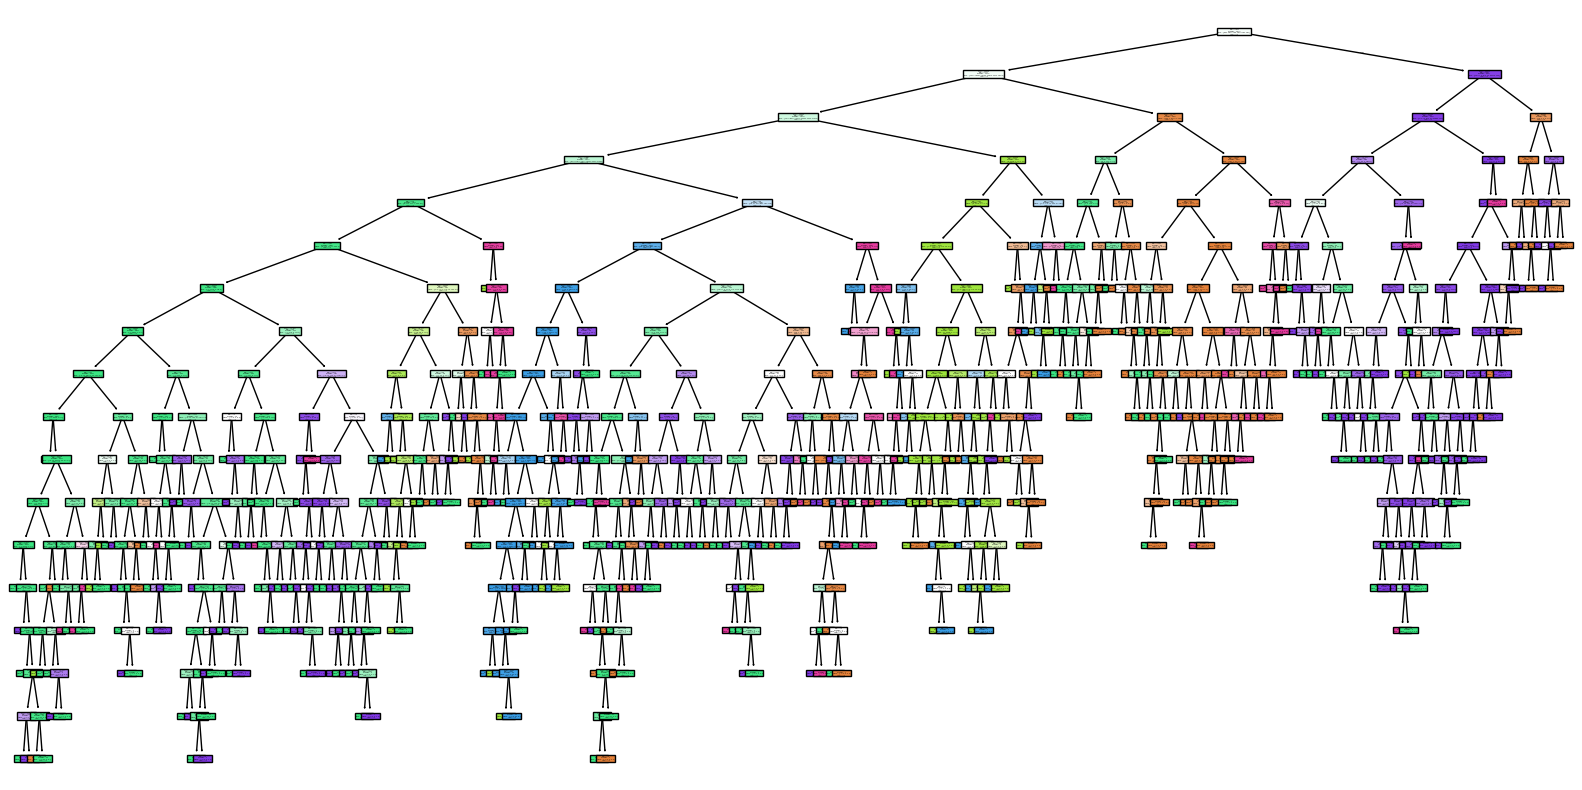

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_names = ["Cl0", "Cl1", "Cl2", "Cl3", "Cl4", "Cl5"]
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], class_names=class_names)
plt.show()


The resulting plot is likely impossible to read. Let's make it actually readable, by looking at just the first few layers.We will also save a higher res version of the figure.

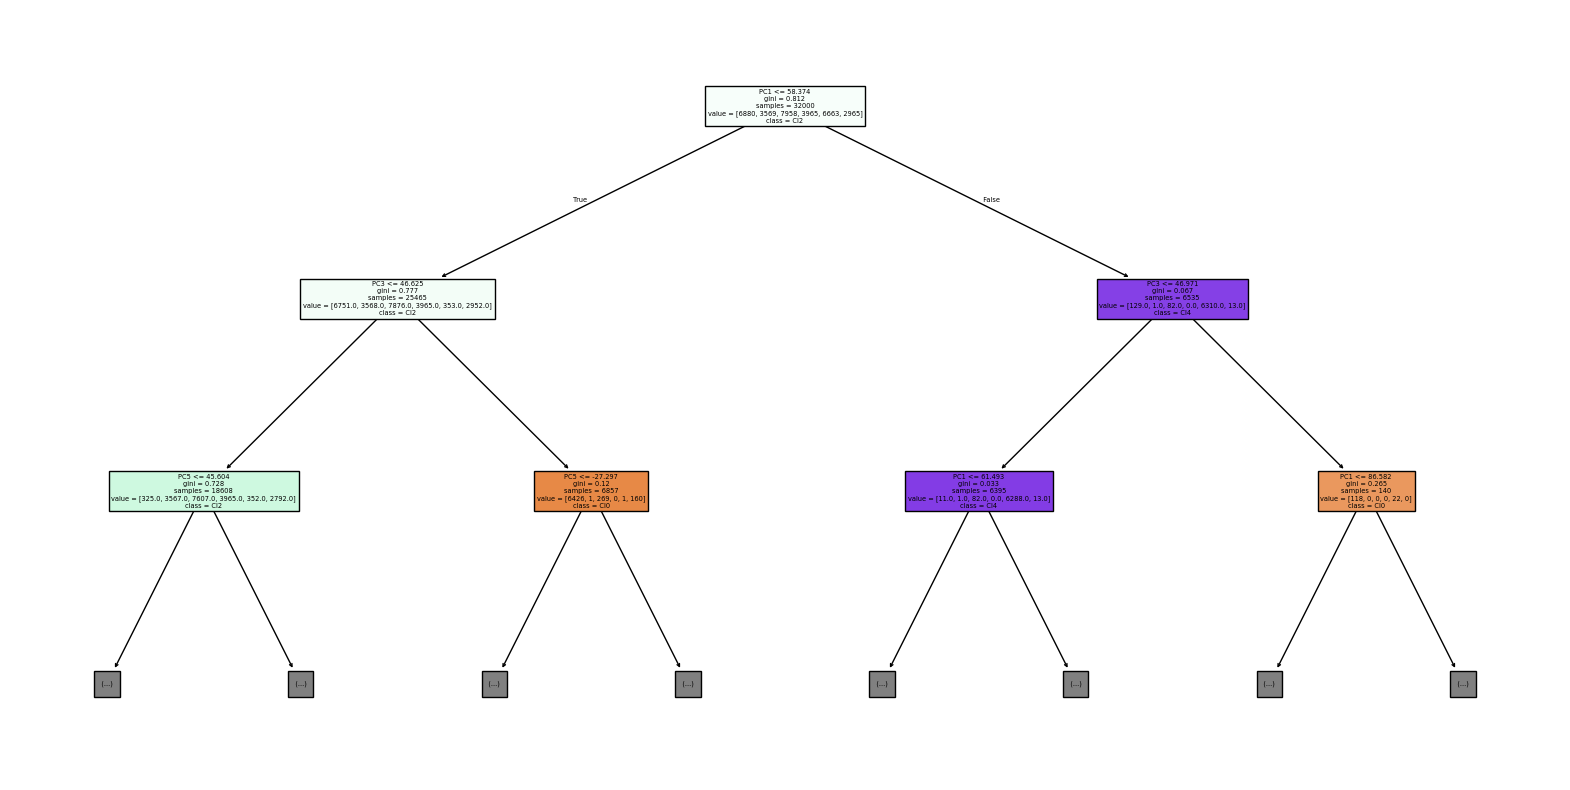

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_names = ["Cl0", "Cl1", "Cl2", "Cl3", "Cl4", "Cl5"]
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], class_names=class_names, max_depth=2)
plt.savefig('decision_tree_high_res_depth2.png', format='png', dpi=600)
plt.show()

This plot should now be readable, and let's interpert it. The purpose of this type of analysis is to find criteria that will cleanly separate out all the different clusters. This can rarely be done perfectly, but let's look at how this is done. Each box (aka node) should have five lines. In my analysis, the top box said:

PC1 <= 58.374. This is the single decision that best separates out the data to the next level of boxes. Data for which this is true goes to the left, data for which this is false goes to the right.

gini =0.812. This is how "pure" the node is. It is 0 if all the data at that node is in a single cluster. For six clusters, the value would be 0.8333 if the data was split evenly, and it's not quite that high.

samples = 32000 That is how many data points there are; this is 80% of the total data points, as 20% were withheld to test on.

value = [ 6880, 3569, 7958, 3965, 6663, 2965] this is how the data at the node is distributued among the different clusters, which for the top node is just the clustering distribution among the training set.

class = Cl2 This is largest cluster in that node.

Question 1: How close is your top box to mine? Two of these lines might vary since the model was trained on a randomly selected 80% of the data.

Question 2: Are there nodes that are fairly pure (gini index < 0.16 > for example), and that contain most of a particular cluster?

If so, which criteria were made to reach those nodes (remember if the node is to the right of a decision, then the decision was false, so the criteria needs to be reversed. )

 What % of the dominate cluster is in these nodes, that is compared to the original population what % of that cluster is in a particular node that you identified? This last question is important because the gini index tells you if a node is largely in a single cluster, but it doesn't tell you how much of the original cluster is accounted for in a node.

Exercise 1: Extend out the depth of the decision tree and see what happens. When do you get to the point where you can identify decisions that will classify most of each cluster into a single relatively pure node? Note, different clusters may need different numbers of decisions. What are the decision for each cluster, the gini index, and what % of each cluster makes itn into the nodes you identify. You will need to change the names of the png files and zoom in on them in Visual Studio rather in the note book. 

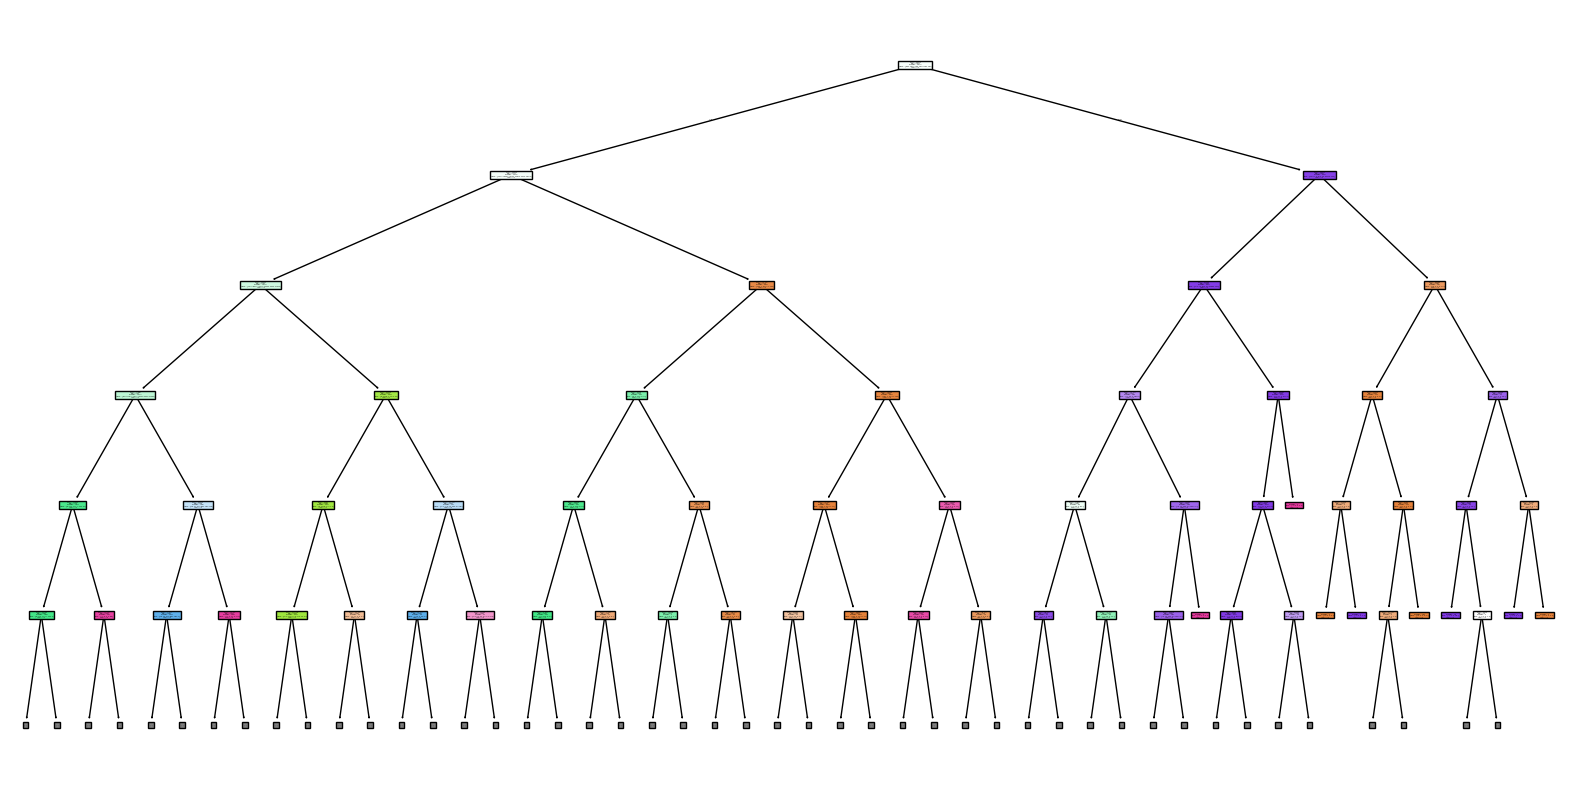

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_names = ["Cl0", "Cl1", "Cl2", "Cl3", "Cl4", "Cl5"]
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], class_names=class_names, max_depth=5)
plt.savefig('decision_tree_high_res_depth5.png', format='png', dpi=600)
plt.show()

Part 4: Random Forest models

One thing that might have come to mind when you were working, is that this tree was trained on 80% of the data randomly selected; what happens if a different set of 80% of the data was selected? Well, that is a good question, and you can get a sense of this from question one, or by comparing your results with your classmates. However, there might be a more efficient way of doing this. There is the "Random Forest model". This is as the name suggests one where you compute many decision trees and find the consensus (mode) result.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X is your feature set and y is your target variable
# Split data into training and testing set
data_train, data_test, cluster_train, cluster_test = train_test_split(data, cluster_labels, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)  # 10 trees in the forest

# Train the model
rf.fit(data_train, cluster_train)

# Make predictions
cluster_pred = rf.predict(data_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(cluster_test, cluster_pred)}")


Accuracy: 0.99025




One issue with random forest modeling is that it uses the consensus results from all the trees to classify data, so you can't visualize and extract precise decisions readily. Whether precise decisions or higher accuracy is more important, will depend on what questions you ask asking. You can plot individial trees to get a sense of how they are different, or you can look for important features.

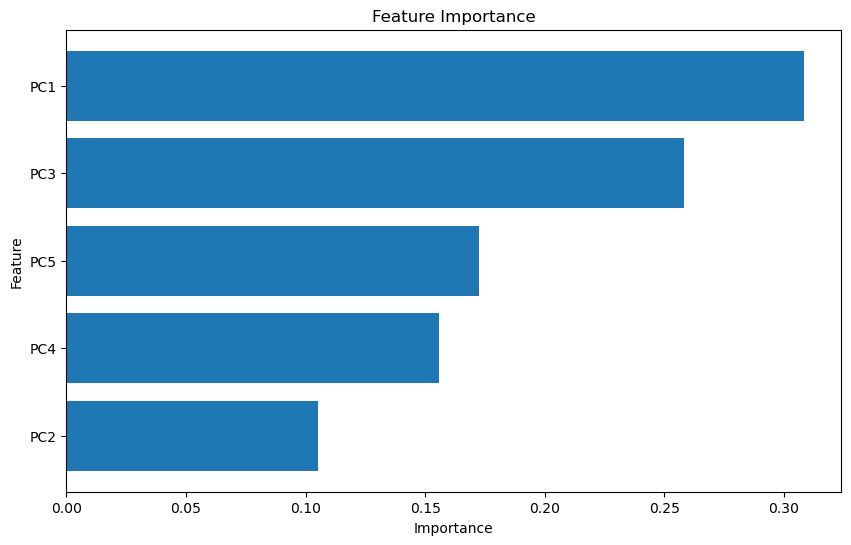

In [43]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


This plot might look kind of lame, and it is not as pretty as many figures you have made. However, keep in mind this is data with only five features, but it does show something interesting. The importance of the features does not simply decline as the PC number increases. This can be a surprise, the PCs account for less and less variance in the structural data as the number increases, yet this is saying for accounting for cluster variation, that PC3 is nearly as important as PC1.

Exercise 2:  What happens to the accuracy and feature importance if you do the random forest classifier for 1, 2, 10, 100 and 1000 trees, be quantitative? Keep in mind this data was pretty-well modeled with a single tree.

You can look at different trees. Obviously you cannot look at all 1000, but here is how we could look at the 10th tree (numbering starts at 0)

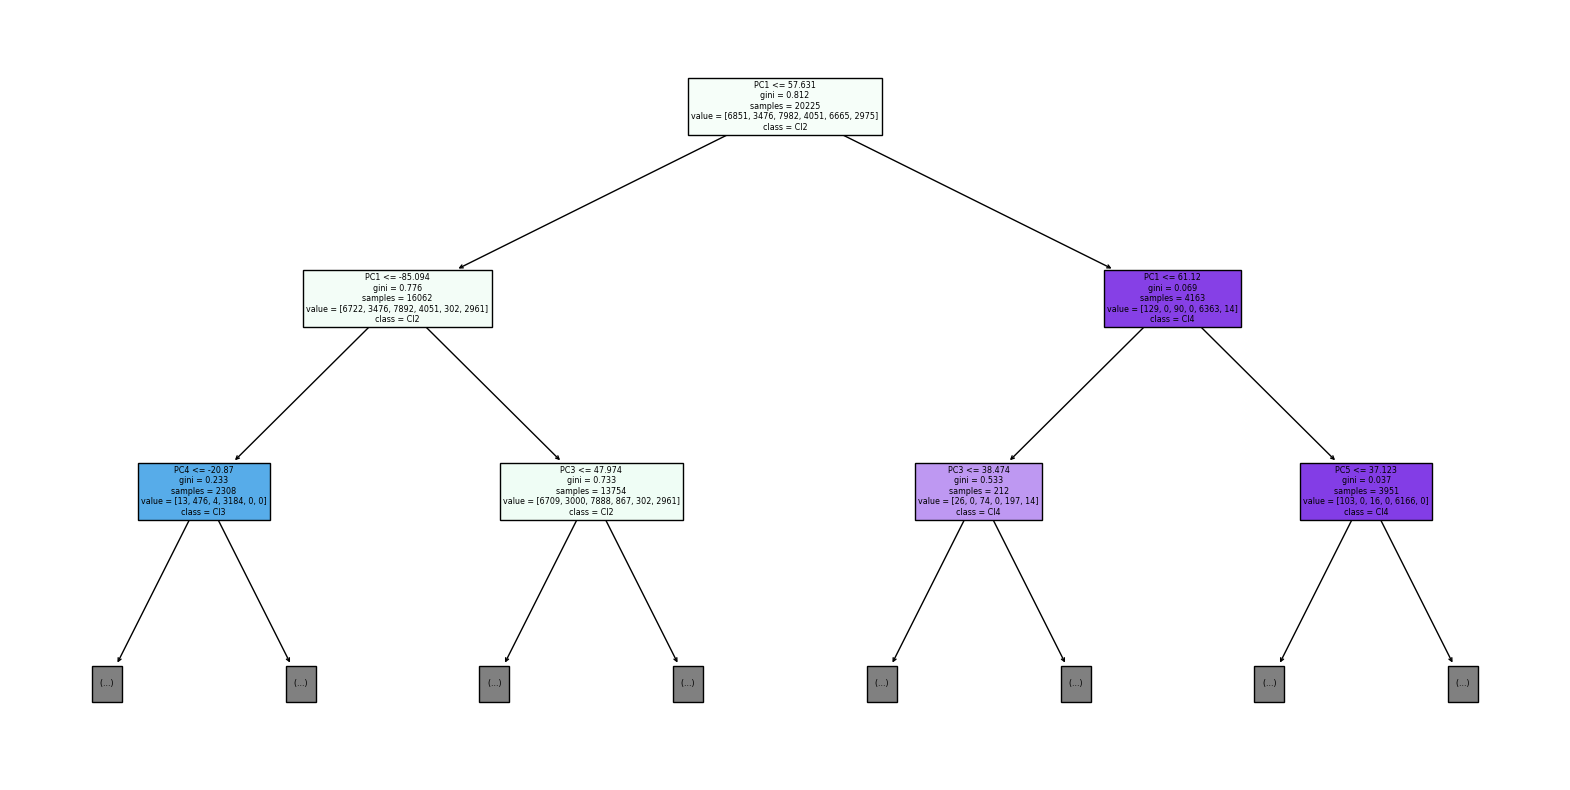

In [50]:
from sklearn.tree import plot_tree

# Select a single tree from the random forest
single_tree = rf.estimators_[9]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], class_names=class_names, filled=True, max_depth=2)
plt.show()


Exercise 3: Look at 5 different trees. How are they different? In particular, how is the first decision different? Are there different low gini nodes that account for a large fraction of a particular cluster?